# Optimising School Infrastructure Planning

**Authored by**:  Linh Huong Nguyen

**Duration**: 90 mins

**Level**: Intermediate

**Pre-requisite Skills**: Python, Pandas, Matplotlib, NumbPy, Seaborn, Scikit-learn


### Scenario

As a government policymaker in the education sector, I want to predict future school enrollment trends and optimise school locations, so that I can ensure efficient resource allocation, avoid overcrowding, and provide access to education in growing communities.

### What this use case will teach you

At the end of this use case, you will have demonstrated the following skills:

- Extracted and imported datasets from open data portals for analysis using APIs.

- Conducted data cleaning and preprocessing to ensure data quality and consistency.

- Performed exploratory data analysis (EDA) to uncover trends, patterns, and anomalies.

- Utilised clustering algorithms to segment regions or data points based on relevant features.

- Applied advanced machine learning and statistical methods to evaluate clustering outcomes and derive meaningful insights.

### Background and Introduction

The rapidly changing demographic landscape and the ongoing shifts in population density pose significant challenges for governments and policymakers in the education sector. As populations grow and migrate, ensuring that educational infrastructure keeps pace with demand is critical. This use case addresses the need for data-driven decision-making in the planning and optimisation of school locations and enrollment projections. By using population forecast by small areas, future school enrollment trends can be identified and schools placements can be strategically made to meet these demands. By using school locations dataset and population forecast by small area dataset, policymakers can make informed decisions that optimise resource distribution, avoid overcrowding in existing schools, and ensure that educational opportunities are accessible to all students, especially in rapidly growing communities.

The overarching objective of this use case is to empower education departments with the tools and insights needed to plan for the future, ensuring that resources are allocated efficiently and effectively while providing equitable access to education for all students. Through strategic school placement and thoughtful infrastructure planning, this use case supports the long-term sustainability of the educational system in response to evolving community needs.

### Datasets used


- [2024 School Locations](https://discover.data.vic.gov.au/dataset/school-locations-2024) <br>
This dataset contains list of all school locations in Victoria. Includes primary and secondary schools, government and non-government. Information collected as part of the ongoing registration of schools. School details include name, school sector, school type, address, phone, region and area. Also included is the departmental region and area which are both based on the school administration campus. This dataset is sourced from the Victoria Department of Education and can be accessed via API V2.1.

- [City of Melbourne Population Forecasts by Small Area 2023-2043](https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-population-forecasts-by-small-area-2020-2040/information/)<br>
This dataset provides population forecasts by single year for 2023 to 2043, divided into genders age group and geography distribution. This dataset is sourced from the Melbourne Open Data website using API V2.1.

- [Small Areas for Census of Land Use and Employment (CLUE)](https://data.melbourne.vic.gov.au/explore/dataset/small-areas-for-census-of-land-use-and-employment-clue/information/) <br>
This dataset contains spatial layer of small areas used for the City of Melbourne's Census Of Land Use And Employment (CLUE) analysis. This dataset is used to provide detailed locations for the This dataset is sourced from the Melbourne Open Data website using API V2.1.


### Importing Datasets

This section imports essential libraries for data manipulation, visualisation, geospatial analysis, interactive mapping, and fetching data from APIs. These libraries provide the necessary functionality for processing, analysing, and visualising the project data effectively.

In [19]:
import requests
import pandas as pd
import os
from io import StringIO
import requests
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import shape, Point
import json

### Loading the datasets using API 2.1v

This section defines functions for fetching data from APIs. The API_Unlimited function retrieves datasets from the Melbourne Open Data Portal using dataset IDs, processes the data into a DataFrame, and provides a preview for verification. Similarly, the fetch_data_from_url function fetches data directly from a given URL, processes it into a DataFrame, and displays a sample for validation. These functions enable seamless access to external datasets for analysis.

In [3]:
def API_Unlimited(datasetname): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))

In [4]:
def API_Unlimited_external(datasetname): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://www.education.vic.gov.au/Documents/about/research/datavic/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}.{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.text
        datasetname = pd.read_csv(StringIO(url_content), delimiter=',')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))



### Fetching and Previewing Datasets

This section defines the dataset download links required for the use case and fetches the corresponding data using the API_Unlimited function. The datasets include coworking spaces, business establishment details, tram stops and metro train stations which are essential for creating a map of all coworking spaces and nearby amenities. After retrieval, the code displays the first few rows of each dataset to confirm successful loading and ensure data integrity.

In [5]:
download_link_1 = 'city-of-melbourne-population-forecasts-by-small-area-2020-2040'
download_link_2 = 'small-areas-for-census-of-land-use-and-employment-clue'
download_link_3 = 'dv378_DataVic-SchoolLocations-2024'

# Use functions to download and load data
population_forecasts = API_Unlimited(download_link_1)
small_areas = API_Unlimited(download_link_2)
school_locations = API_Unlimited_external(download_link_3)

                          geography  year  gender        age  value
9869                      Southbank  2028  Female    Age 0-4    547
1234                Melbourne (CBD)  2039    Male  Age 75-79    360
7339                        Carlton  2024  Female  Age 15-19   1046
6302                    South Yarra  2042    Male  Age 65-69     99
6867   West Melbourne (Residential)  2026    Male  Age 70-74     73
1211                Melbourne (CBD)  2038  Female  Age 55-59    609
9875                      Southbank  2028    Male  Age 30-34   3271
10449  West Melbourne (Residential)  2037  Female  Age 15-19    173
8939                North Melbourne  2032  Female  Age 65-69    218
1160                Melbourne (CBD)  2035  Female  Age 20-24   9716
                               geo_point_2d  \
2    -37.83760704949379, 144.98292521995853   
4     -37.79152998205382, 144.9204996881507   
11    -37.81851829412262, 144.9416850851487   
6    -37.81381109987871, 144.96291513859617   
12     -37.796011

### Displaying Dataset Overview

This part of the code verifies the datasets by displaying their dimensions and a preview of the first few rows. It ensures that the datasets have been successfully loaded and are ready for analysis. 

In [6]:
print(population_forecasts.head())
print(population_forecasts.info())

  geography  year  gender        age  value
0   Carlton  2023  Female  Age 40-44    343
1   Carlton  2023  Female    Age 5-9    203
2   Carlton  2023  Female  Age 55-59    250
3   Carlton  2023  Female  Age 65-69    224
4   Carlton  2023  Female  Age 75-79    121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10584 entries, 0 to 10583
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   geography  10584 non-null  object
 1   year       10584 non-null  int64 
 2   gender     10584 non-null  object
 3   age        10584 non-null  object
 4   value      10584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 413.6+ KB
None


In [7]:
print(small_areas.head())
print(small_areas.info())

                             geo_point_2d  \
0   -37.78711656492933, 144.9515603312268   
1  -37.82529018627908, 144.96176162794978   
2  -37.83760704949379, 144.98292521995853   
3  -37.814581164837946, 144.9825008488323   
4   -37.79152998205382, 144.9204996881507   

                                           geo_shape      featurenam  \
0  {"coordinates": [[[[144.94036533536232, -37.78...       Parkville   
1  {"coordinates": [[[[144.95599687351128, -37.82...       Southbank   
2  {"coordinates": [[[[144.98502208625717, -37.84...     South Yarra   
3  {"coordinates": [[[[144.9732217743585, -37.807...  East Melbourne   
4  {"coordinates": [[[[144.936867787351, -37.7888...      Kensington   

     shape_area    shape_len  
0  4.050997e+06  9224.569397  
1  1.596010e+06  6012.377239  
2  1.057773e+06  5424.136446  
3  1.909073e+06  6557.914249  
4  3.808797e+06  9407.055421  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Col

In [8]:
print(school_locations.head())
print(school_locations.info())

  Education_Sector  Entity_Type  School_No                    School_Name  \
0         Catholic            2         20                 Parade College   
1         Catholic            2         25       Simonds Catholic College   
2         Catholic            2         26    St Mary’s College Melbourne   
3         Catholic            2         28  St Patrick's College Ballarat   
4         Catholic            2         29            St Patrick's School   

  School_Type             Address_Line_1 Address_Line_2    Address_Town  \
0   Secondary           1436 Plenty Road            NaN        BUNDOORA   
1   Secondary        273 Victoria Street            NaN  WEST MELBOURNE   
2   Secondary         11 Westbury Street            NaN   ST KILDA EAST   
3   Secondary          1431 Sturt Street            NaN        BALLARAT   
4     Primary  119 Drummond Street South            NaN        BALLARAT   

  Address_State  Address_Postcode  ...     Postal_Town Postal_State  \
0           VIC

### Data Cleaning and Processing

#### Check for missing values and Duplicate Values

This section performs a data quality check by identifying missing values and duplicate rows in the coworking spaces, business establishments, tram stops and metro train stations datasets. This helps ensure the data is clean and ready for further analysis by highlighting potential issues that need to be addressed.

- Population Forecast Dataset

In [9]:
# Check if there are any missing values in the datasets
print(population_forecasts.isnull().sum())

#Check if there are any duplicates in the datasets
print(f"\nDuplicate rows in Population Forecast Dataset: {population_forecasts.duplicated().sum()}\n")  # Check for duplicates in the dataset and print the count of duplicates.

geography    0
year         0
gender       0
age          0
value        0
dtype: int64

Duplicate rows in Population Forecast Dataset: 0



- Small Areas Dataset

In [10]:
# Check if there are any missing values in the datasets
print(small_areas.isnull().sum())

#Check if there are any duplicates in the datasets
print(f"\nDuplicate rows in Small Areas Dataset: {small_areas.duplicated().sum()}\n")  # Check for duplicates in the dataset and print the count of duplicates.

geo_point_2d    0
geo_shape       0
featurenam      0
shape_area      0
shape_len       0
dtype: int64

Duplicate rows in Small Areas Dataset: 0



- School Locations Dataset

In [11]:
# Check if there are any missing values in the datasets
print(school_locations.isnull().sum())

#Check if there are any duplicates in the datasets
print(f"\nDuplicate rows in School Locations Dataset: {school_locations.duplicated().sum()}\n")  # Check for duplicates in the dataset and print the count of duplicates.

Education_Sector            0
Entity_Type                 0
School_No                   0
School_Name                 0
School_Type                 0
Address_Line_1              0
Address_Line_2           2283
Address_Town                0
Address_State               0
Address_Postcode            0
Postal_Address_Line_1       2
Postal_Address_Line_2    2280
Postal_Town                 2
Postal_State                2
Postal_Postcode             2
Full_Phone_No               0
Region_Name                 0
AREA_Name                   0
LGA_ID                      0
LGA_Name                    0
X                           1
Y                           1
dtype: int64

Duplicate rows in School Locations Dataset: 0



#### Handling Missing and Duplicate Data

This section addresses missing values in the school locations dataset by removing irrelevant and redundant columns. This operation helps reduce the complexity of the data, making it easier to work with and ensuring that only the most relevant information remains in the dataset.

#### Removing unnecessary columns

In [12]:
school_clean=school_locations.drop(columns=['Address_Line_2','Entity_Type','Postal_Address_Line_1','Postal_Address_Line_2','Postal_Town','Postal_State','Postal_Postcode','LGA_ID','LGA_Name'])

The above line of code performs a data cleaning operation on the school_locations dataset by removing specific columns that are deemed unnecessary or irrelevant for the analysis

#### Handling missing values

In [13]:
# Check if there are any missing values in the two datasets
print(school_clean.isnull().sum())
print(population_forecasts.isnull().sum())
print(small_areas.isnull().sum())


Education_Sector    0
School_No           0
School_Name         0
School_Type         0
Address_Line_1      0
Address_Town        0
Address_State       0
Address_Postcode    0
Full_Phone_No       0
Region_Name         0
AREA_Name           0
X                   1
Y                   1
dtype: int64
geography    0
year         0
gender       0
age          0
value        0
dtype: int64
geo_point_2d    0
geo_shape       0
featurenam      0
shape_area      0
shape_len       0
dtype: int64


This code is used to check for any missing (null) values in three datasets. The method is applied to each dataset, which returns a Boolean DataFrame indicating whether each cell contains a null value (True for null and False for non-null). The sum() function is then used to count the number of missing values in each column of the respective datasets. This step is crucial for ensuring data quality and readiness for subsequent processing tasks.

In [14]:
school_clean = school_clean.dropna(subset=['X', 'Y'])

The code is used to remove any rows in the school_clean dataset where the 'X' (longitude) or 'Y' (latitude) columns contain missing or null values. This operation is essential to ensure that subsequent spatial analysis or mapping tasks (such as plotting locations on a map) are performed without errors due to missing geospatial data.

#### Data Subsetting

- School Locations

In [20]:
# Convert school points to GeoDataFrame
school_gdf = gpd.GeoDataFrame(
    school_clean,
    geometry=gpd.points_from_xy(school_clean.X, school_clean.Y),
    crs="EPSG:4326"
)

# Extract unique polygons from population dataset
polygon_list = small_areas['geo_shape'].dropna().unique()
population_polygons = [shape(json.loads(poly)) for poly in polygon_list]

# Create a GeoDataFrame for all population polygons
population_gdf = gpd.GeoDataFrame(geometry=population_polygons, crs="EPSG:4326")

# Perform spatial join or point-in-polygon test
filtered_schools = school_gdf[school_gdf.geometry.apply(lambda point: any(poly.contains(point) for poly in population_polygons))]

filtered_schools.head()

,Education_Sector,School_No,School_Name,School_Type,Address_Line_1,Address_Town,Address_State,Address_Postcode,Full_Phone_No,Region_Name,AREA_Name,X,Y,geometry
1,Catholic,25,Simonds Catholic College,Secondary,273 Victoria Street,WEST MELBOURNE,VIC,3003,03 9321 9200,SOUTH-WESTERN VICTORIA,Western Melbourne,144.95288,-37.80597,POINT (144.95288 -37.80597)
11,Catholic,98,St Michael’s Primary School,Primary,8-14 Brougham Street,NORTH MELBOURNE,VIC,3051,03 9329 9206,SOUTH-WESTERN VICTORIA,Western Melbourne,144.94625,-37.79330,POINT (144.94625 -37.7933)
94,Catholic,605,St Aloysius College,Secondary,31 Curran Street,NORTH MELBOURNE,VIC,3051,03 9325 9200,SOUTH-WESTERN VICTORIA,Western Melbourne,144.94287,-37.79289,POINT (144.94287 -37.79289)
135,Catholic,1033,Holy Rosary School,Primary,37 Gower Street,KENSINGTON,VIC,3031,03 9376 9455,SOUTH-WESTERN VICTORIA,Western Melbourne,144.92878,-37.79558,POINT (144.92878 -37.79558)
468,Catholic,2079,St Joseph's,Special,385 Queensberry Street,NORTH MELBOURNE,VIC,3051,03 9269 6900,SOUTH-WESTERN VICTORIA,Western Melbourne,144.95494,-37.80384,POINT (144.95494 -37.80384)


This code performs a spatial analysis by converting the school location dataset and population polygons into GeoDataFrames, then checks which school points are located within specific population polygons. 

It filters the school locations to only include those that are located within specific population areas by converting the school points and population polygons into GeoDataFrames, then using a point-in-polygon test to check whether each school is inside the defined population areas. The resulting filtered dataset (filtered_schools) can be used for further analysis, such as mapping or spatial analysis related to school location planning.

- Population Forecast dataset

In [21]:
relevant_age_groups = ['Age 5-9', 'Age 10-14', 'Age 15-19']
population_forecasts_COM = population_forecasts[population_forecasts['geography']!='City of Melbourne']
population_age_groups = population_forecasts_COM[population_forecasts_COM['age'].isin(relevant_age_groups)]

This code filters the population forecast dataset to focus on specific age groups (5-9, 10-14, and 15-19) and excludes the City of Melbourne as it represents the aggregated data of all small areas. First, the City of Melbourne data is omitted by filtering out rows where the 'geography' column equals "City of Melbourne". Next, the dataset is further filtered to retain only the rows corresponding to the relevant age groups defined in the relevant_age_groups list. The result, population_age_groups, contains population forecast data specific to each small area for the selected age groups, excluding the aggregated data for the entire city. This ensures that only the data for individual areas, broken down by age group, is retained for further analysis.

#### Merge Datasets

As the Population Forecasting dataset does not contain information of longtitude and latitude for each small area, this dataset is merged with Small Area dataset (CLUE) for further use of visualisation tools.

In [33]:
merged_population_and_small_area = pd.merge(population_age_groups, small_areas, left_on='geography', right_on='featurenam', how='inner')
merged_population_and_small_area.head()

,geography,year,gender,age,value,geo_point_2d,geo_shape,featurenam,shape_area,shape_len
0,Carlton,2023,Female,Age 5-9,203,"-37.79601167728975, 144.966376105915","{""coordinates"": [[[[144.9732217743585, -37.807...",Carlton,2.724821e+06,9914.977304
1,Carlton,2024,Female,Age 10-14,190,"-37.79601167728975, 144.966376105915","{""coordinates"": [[[[144.9732217743585, -37.807...",Carlton,2.724821e+06,9914.977304
2,Carlton,2024,Male,Age 15-19,745,"-37.79601167728975, 144.966376105915","{""coordinates"": [[[[144.9732217743585, -37.807...",Carlton,2.724821e+06,9914.977304
3,Carlton,2025,Female,Age 10-14,185,"-37.79601167728975, 144.966376105915","{""coordinates"": [[[[144.9732217743585, -37.807...",Carlton,2.724821e+06,9914.977304
4,Carlton,2025,Female,Age 5-9,208,"-37.79601167728975, 144.966376105915","{""coordinates"": [[[[144.9732217743585, -37.807...",Carlton,2.724821e+06,9914.977304


This code performs an inner join between two datasets: population_forecasts_by_area and small_areas, based on the 'geography' column from the population forecast dataset and the 'featurenam' column from the small areas dataset. The function merges these two datasets, keeping only the rows where there is a match between the specified columns (i.e., the areas from both datasets correspond to the same geographical location). The result contains a unified dataset with population forecast data and small area information, such as geographical boundaries, for each matching area. This operation combines relevant data from both sources, ensuring that the analysis focuses on specific areas with both population and spatial information.

### Data Exploration and Visualisation

#### Visualisation of School locations

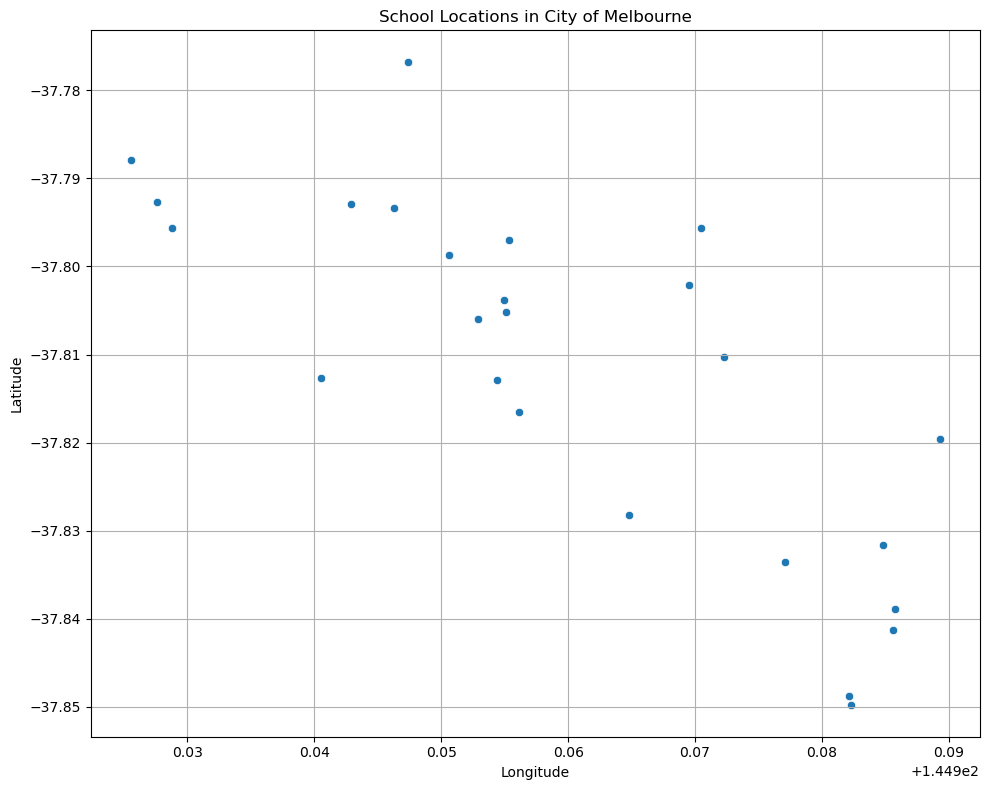

In [34]:
# Create the plot
plt.figure(figsize=(10, 8))

sns.scatterplot(x=filtered_schools['X'], y=filtered_schools['Y'])
plt.title('School Locations in City of Melbourne')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot titled visualises the geographic distribution of schools based on their latitude and longitude coordinates. The data points are concentrated within a narrow band of longitudes ranging approximately from 144.92°E to 144.99°E, and latitudes from –37.78°S to –37.85°S, reflecting the dense urban layout of Melbourne's central business district. The plot reveals a generally southward and slightly eastward spread of school locations, indicating that schools are relatively evenly distributed along this corridor. The cluster near the center of the plot suggests a higher concentration of schools in the midsection of the CBD, likely reflecting areas with greater population density or mixed-use development. This spatial pattern provides a useful reference for urban planning, school catchment analysis, or accessibility assessments within the Melbourne CBD area.

#### Visualisation of Population Forecase dataset

- By small areas

The below code generates a line plot that visualises the population growth over time across different small areas within a dataset.

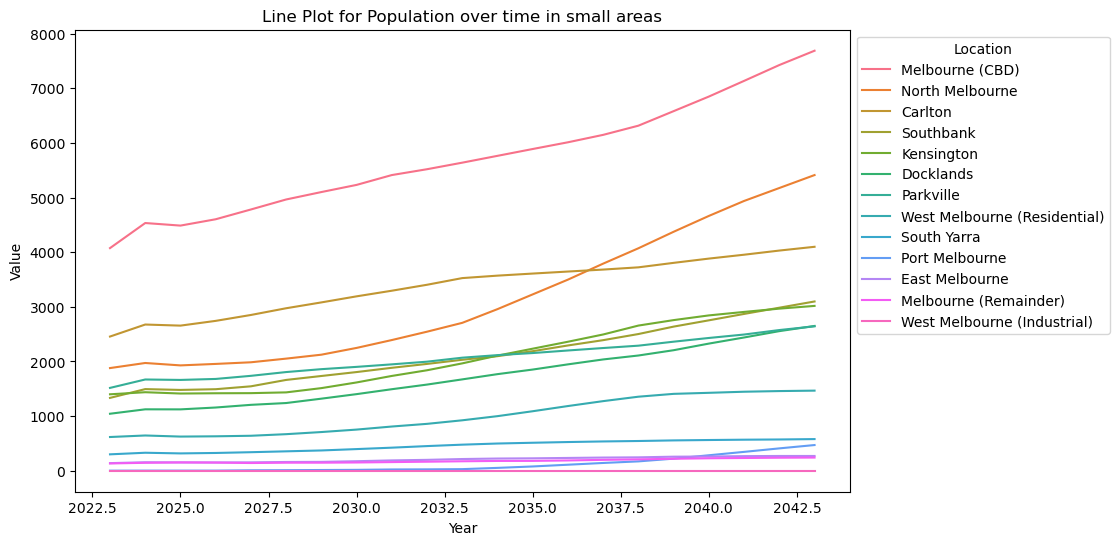

In [35]:
population_forecasts_by_area_agg = merged_population_and_small_area.groupby(['geography','year'])['value'].sum().reset_index().sort_values(by='value',ascending=False)
plt.figure(figsize=(10,6))
plot= sns.lineplot(data=population_forecasts_by_area_agg, x='year', y='value', hue='geography')
plt.title('Line Plot for Population over time in small areas')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Location')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

The line plot illustrates projected population growth over time (2023–2043) across various small areas within the City of Melbourne. It is evident that Melbourne (CBD) is expected to maintain the highest population, with a steady and significant increase from around 4,100 in 2023 to nearly 8,000 by 2043. North Melbourne and Carlton follow as the next most populous areas, both showing consistent upward trends, with North Melbourne experiencing a particularly strong acceleration after 2033. Areas like Southbank, Kensington, Docklands, and Parkville also exhibit notable growth, indicating these are key residential expansion zones.

In contrast, West Melbourne (Industrial) remains flat, suggesting minimal or no expected residential population, likely due to zoning restrictions. East Melbourne and Port Melbourne show only modest growth, while Melbourne (Remainder) sees a slight uptick. Overall, this visualisation highlights a clear pattern of central and inner-suburban densification, suggesting targeted infrastructure, service delivery, and planning attention may be needed in rapidly growing districts such as Melbourne CBD and North Melbourne.

- By age group

<Figure size 1400x800 with 0 Axes>

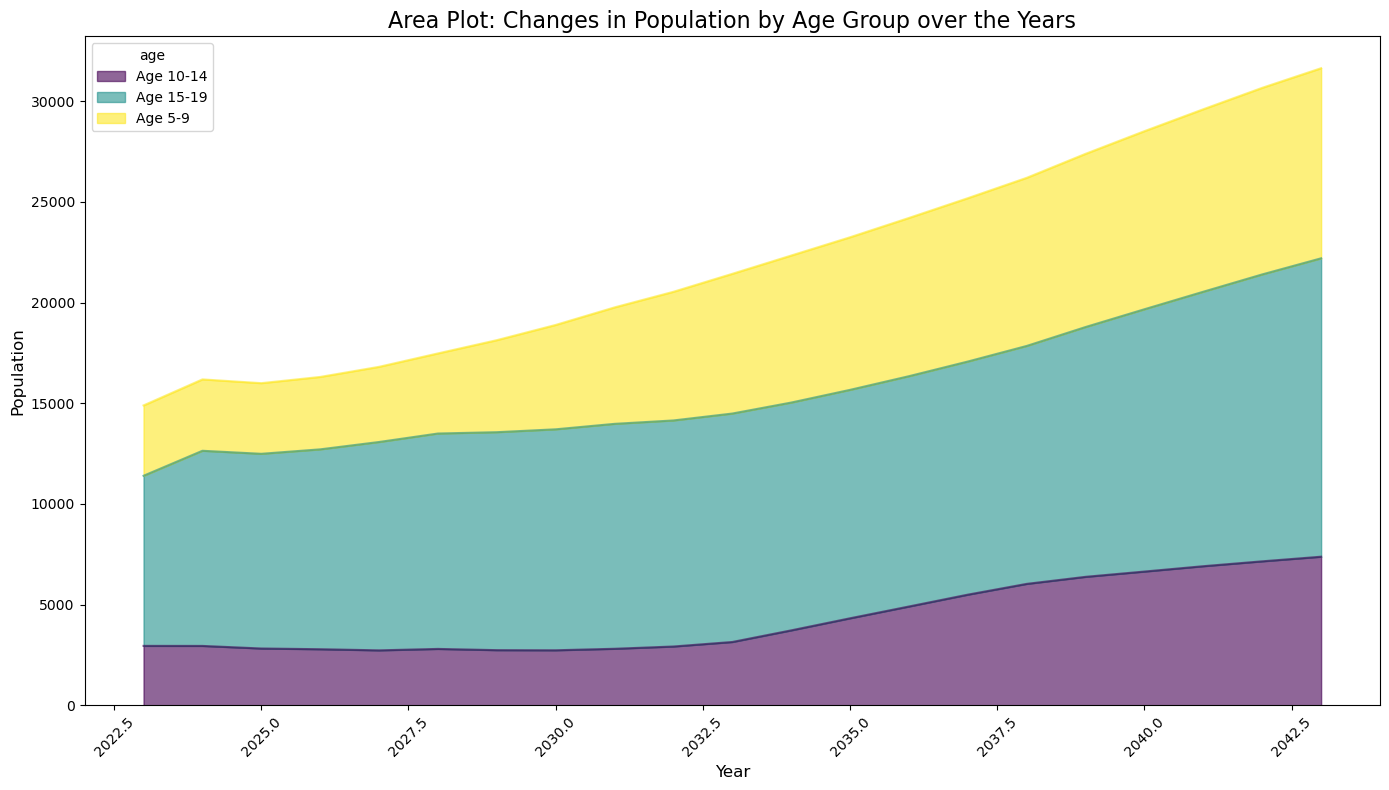

In [36]:
# Create the area plot
area_plot_data = merged_population_and_small_area.pivot_table(values='value', index='year', columns='age', aggfunc='sum')

# Plot the area plot
plt.figure(figsize=(14, 8))
area_plot_data.plot(kind='area', stacked=True, alpha=0.6, figsize=(14, 8), cmap='viridis')

# Add titles and labels
plt.title('Area Plot: Changes in Population by Age Group over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The area plot illustrates projected changes in population across three school-aged groups—Age 5–9, Age 10–14, and Age 15–19—from approximately 2023 to 2043. All three age groups show a steady upward trend, indicating a consistent growth in the youth population over the two-decade period. Among them, the 15–19 age group maintains the largest share throughout the forecast period, suggesting continued demand for secondary and late-stage schooling infrastructure. The 5–9 age group also shows significant growth, particularly after 2030, implying a need for expansion in primary education services. Notably, the 10–14 age group experiences the most visible acceleration in growth after 2033, possibly reflecting a demographic transition where younger cohorts age into this bracket. Overall, this trend underscores the importance of long-term planning for educational facilities, especially in areas anticipating higher concentrations of school-aged children.

#### Visualisation of Population Forecast in years with School Locations

In [52]:
merged_population_and_small_area[['lat', 'lon']] = merged_population_and_small_area['geo_point_2d'].str.split(',', expand=True).astype(float)
merged_population_and_small_area.dropna(subset=['lat', 'lon'], inplace=True)
population_by_year_and_area = merged_population_and_small_area.groupby(['year', 'geography','lat','lon'])['value'].sum().reset_index()

This code processes geographic coordinates stored in a single string column  by splitting it into separate latitude (lat) and longitude (lon) columns. The values in geo_point_2d are assumed to be in the format "lat,lon" as a comma-separated string. The split function splits each string at the comma, and the resulting components are assigned to new columns named lat and lon. These values are then converted to floating-point numbers to ensure they are in the correct numeric format for spatial analysis. After splitting and conversion, dropna is used to remove any rows where either lat or lon is missing (i.e., contains a null value), ensuring that the dataset is clean and contains only rows with valid geographic coordinates. This step is essential for accurate plotting or spatial analysis tasks such as mapping population data by location.

In [53]:
# Create a base map centered around Melbourne
melbourne_center = [-37.8136, 144.9631]
m = folium.Map(location=melbourne_center, zoom_start=15)
for _, row in filtered_schools.iterrows():
        folium.Marker(
            location=[row['Y'], row['X']],
            tooltip=f"<b>{row['School_Name']}</b><br>{row['School_Type']}<br>{row['Address_Line_1']}",
            icon=folium.Icon(color='blue', icon='briefcase', prefix='fa')
        ).add_to(m)

This code generates an interactive Folium map that displays the locations of schools filtered from a dataset. The map is centered around Melbourne's central coordinates ([-37.8136, 144.9631]) and initialised with a zoom level of 15, providing a detailed view of the city.

The for loop iterates over each row in the filtered_schools DataFrame, which contains school records with valid geographic coordinates. For each school, a Folium marker is created at its location using the Y (latitude) and X (longitude) values. The marker includes a tooltip that displays key information when hovered over: the school’s name, type, and its street address (from Address_Line_1). The markers are styled with a blue icon resembling a briefcase.

Each marker is added to the map, which results in an interactive map where users can visually explore school locations and inspect the population forecast in a specific year. This is particularly useful for spatial analysis, urban planning, or education infrastructure visualisation.

In [54]:
for year in sorted(population_by_year_and_area['year'].unique()):
    yearly_data = population_by_year_and_area[population_by_year_and_area['year'] == year]
    fg = folium.FeatureGroup(name=str(year),show=False)

    for _, row in yearly_data.iterrows():
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=row['value']/100 ,  # Scale radius
            color='blue',
            fill=True,
            fill_opacity=0.6,
            popup=f"{row['geography']}<br>Population: {int(row['value'])}"
        ).add_to(fg)
    fg.add_to(m)
title_html = '''
     <h3 align="center" style="font-size:16px"><b>Population Forecast in years with School Locations</b></h3>
'''
# Add the title to the map
m.get_root().html.add_child(folium.Element(title_html))

folium.LayerControl(collapsed=False).add_to(m)

# Display 
m

This code adds year-by-year population forecast data as interactive layers to a Folium map, allowing users to toggle between years to explore changes in population across different geographic locations.

It begins by looping through each unique year in the DataFrame, which contains population forecasts along with corresponding latitude and longitude values for various small areas. For each year, the data is filtered and a FeatureGroup is created, labeled with the year and initially set to not visible (show=False).

Inside each yearly group, folium.CircleMarker is used to add population indicators on the map. Each marker is centered on the location (lat, lon) of a small area and has a radius proportional to the population size (value/100), allowing for intuitive visual comparison. The markers are styled with a blue fill and include popups displaying the area name and population count.

After all markers for that year are added, the layer is added to the map (m). A custom HTML title is then inserted at the top of the map using folium.Element, providing context for the visualisation. Finally, a layer control panel is added using folium.LayerControl(collapsed=False) to let users toggle visibility of individual year layers.

This interactive visualisation supports temporal exploration of population growth, especially useful for planning and decision-making related to infrastructure such as schools, services, or urban development.

#### Key insights

1. Strong Population Growth in Melbourne CBD
The population forecast data shows a significant upward trend in Melbourne (CBD) from 2023 to 2043. For example, the population in this area is expected to grow from approximately 4,100 in 2023 to nearly 7,700 by 2043—an increase of almost 90% over two decades. This indicates a steady and substantial growth trajectory, likely driven by urban residential development and densification in central Melbourne.

2. School Density in Adjacent Inner Suburbs
While the dataset includes several schools with geographic coordinates placing them near the CBD, none of the schools fall directly within the boundaries of Melbourne (CBD) based on current coordinates. Instead, schools are clustered in adjacent inner suburbs such as North Melbourne, Kensington, and West Melbourne. These areas currently support the educational needs of families residing near the CBD.

3. Potential Undersupply of Schools in the CBD Core
Given the projected growth in residential population within Melbourne CBD and the lack of schools within its immediate geographic boundaries, there may be a future gap in educational infrastructure. This mismatch highlights the importance for urban planners and policymakers to assess the need for new school developments or expansions within or at the edges of the CBD to meet the anticipated demand.

4. Strategic Opportunity for Educational Planning
The combination of rapid population growth and limited school presence in the CBD presents a strategic opportunity for long-term educational planning. This may include identifying suitable sites for new primary and secondary schools, improving public transport links to schools in adjacent suburbs, or expanding capacity at nearby institutions.

In summary, while Melbourne CBD is experiencing robust population growth, it currently lacks school infrastructure within its core, relying heavily on surrounding neighborhoods. Proactive educational planning will be essential to ensure that future residents have equitable access to schooling options. 